In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


# car driver

In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [4]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

X = filtered_data[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                    ]]

y = filtered_data['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 6.3354250708579185
MAE: 3.683727904376737
R^2: 0.8163097860075949


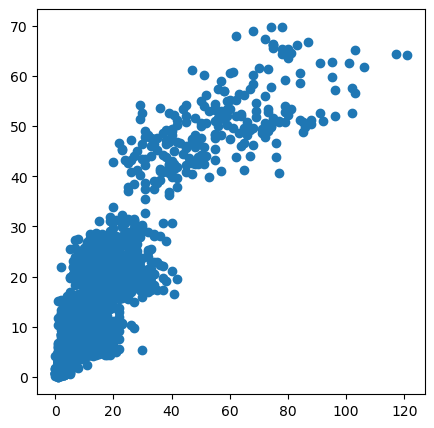

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [6]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 4.675387576137487
MAE: 2.9834702957344885
R^2: 0.7575194030545715


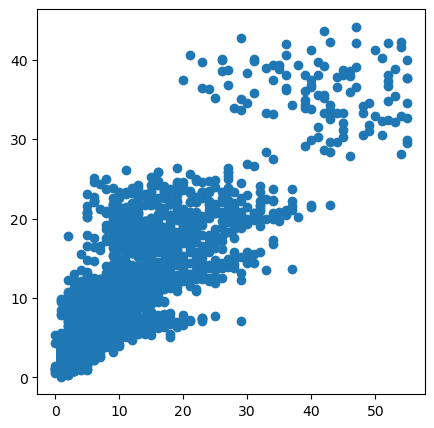

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [8]:
count_zeros = pd.Series(y).value_counts().get(0, 0)

print("تعداد صفرها در y:", count_zeros)

تعداد صفرها در y: 28


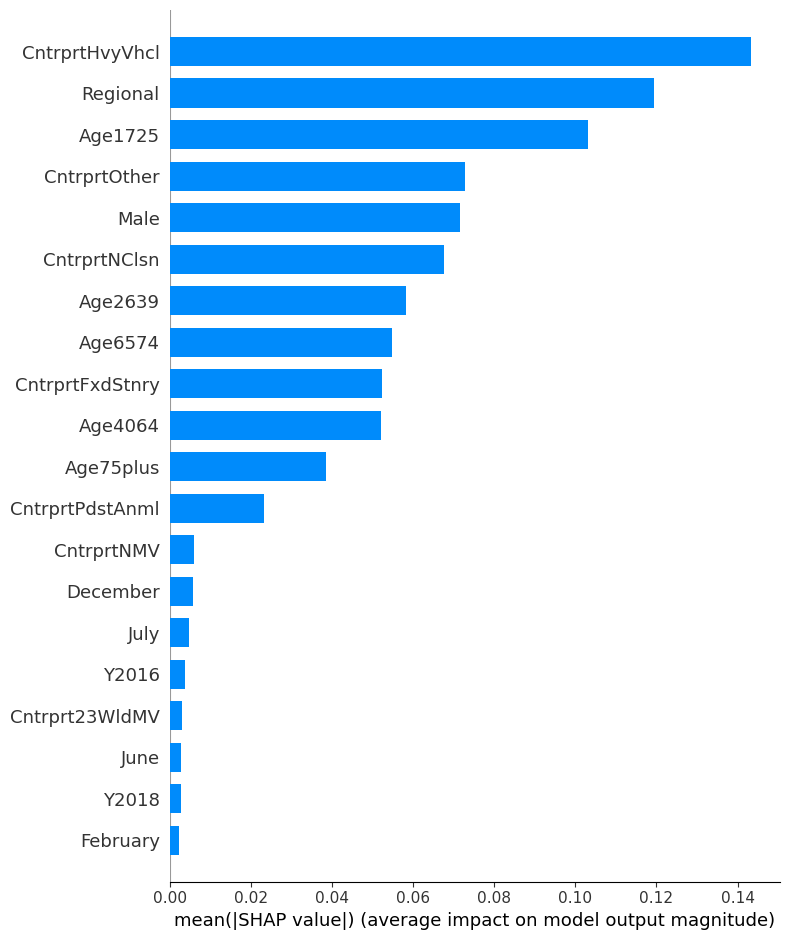

In [9]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


# car passanger

In [10]:
filtered_data2 = data[data['CarPngr'] == 1]

In [11]:
X = filtered_data2[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                    ]]

y = filtered_data2['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.858408742212426
MAE: 1.838660353264595
R^2: 0.6491529334271411


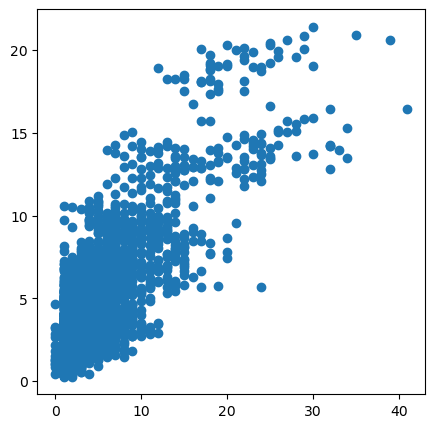

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [13]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.340770259564955
MAE: 1.6174555306383742
R^2: 0.5357056394325537


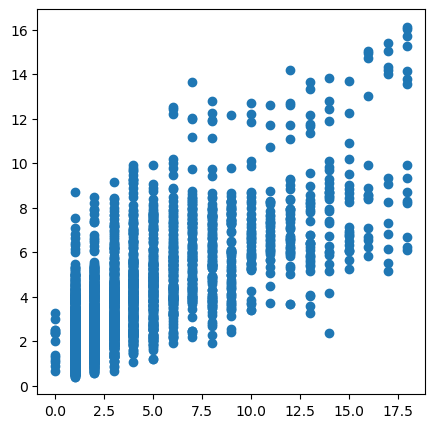

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

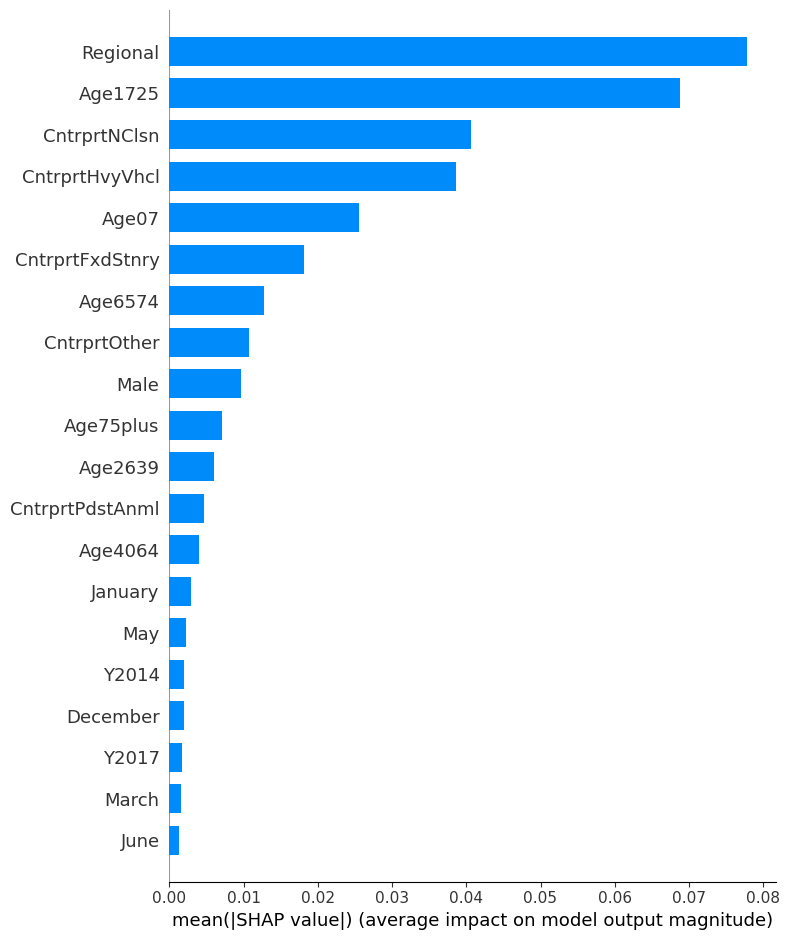

In [15]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


# Mtrcyclist REGRESION

In [35]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [17]:
X = filtered_data3[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                    ]]

y = filtered_data3['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 4.3508955311915685
MAE: 2.5874371407551693
R^2: 0.879266559486385


In [18]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 3.595700305115478
MAE: 2.2474512199776773
R^2: 0.8330812528807535


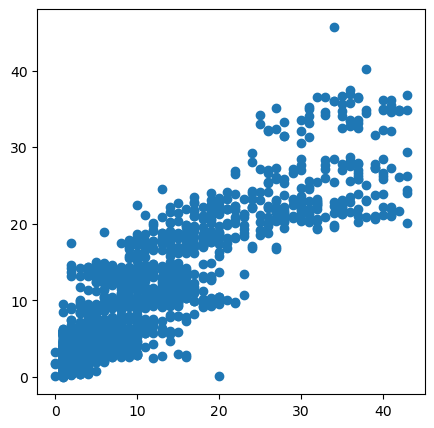

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

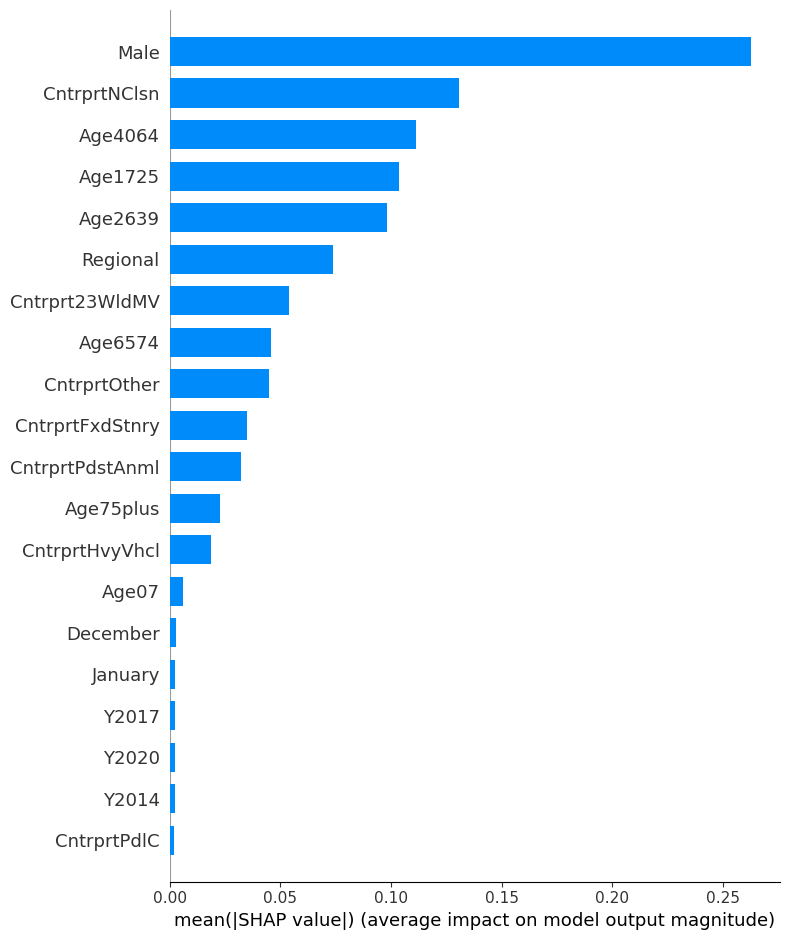

In [20]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


# Pedal cyclist Regrasion

In [24]:
filtered_data4 = data[data['PdlCyclist'] == 1]
X = filtered_data4[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                    ]]

y = filtered_data4['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 3.2834461586691277
MAE: 2.0522727359019166
R^2: 0.8645146056613685


In [25]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.6993909099540874
MAE: 1.8011733119578603
R^2: 0.7732282415224943


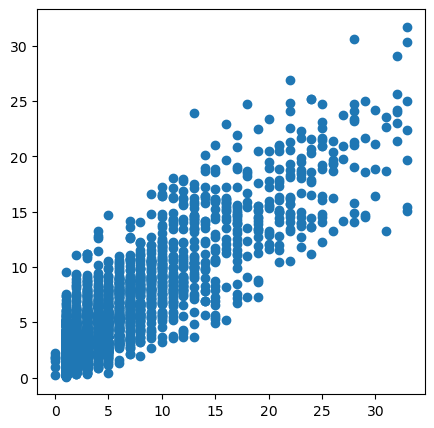

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

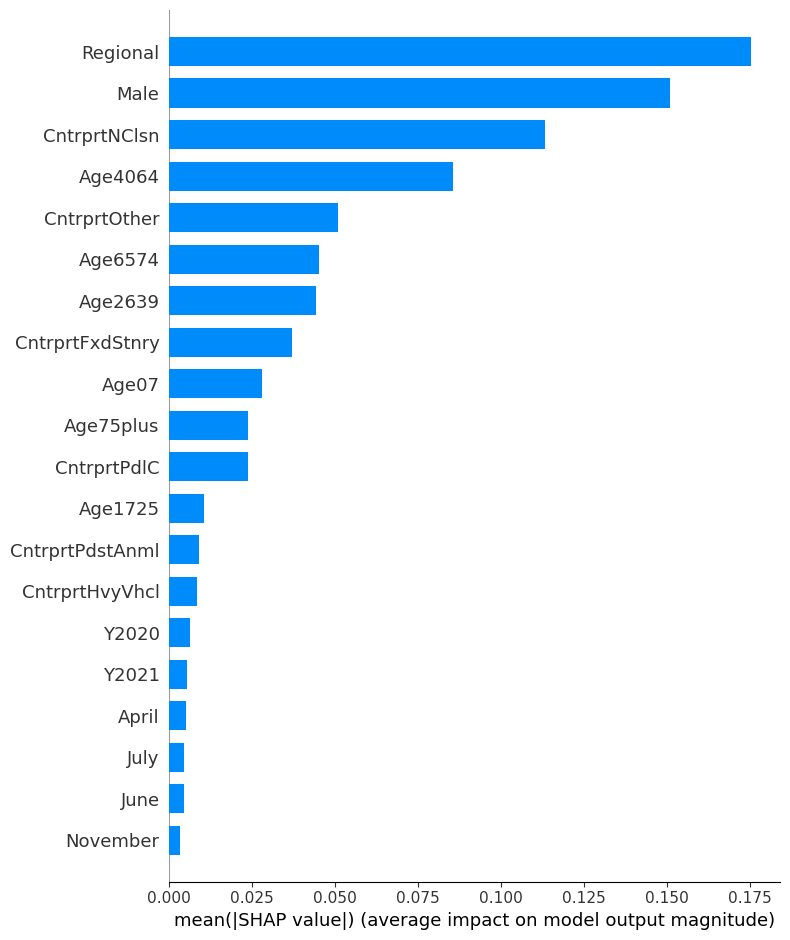

In [27]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


# Pedestrian REGRESION

In [31]:
filtered_data5 = data[data['Pedestrian'] == 1]


In [32]:
X = filtered_data5[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                    ]]

y = filtered_data5['Hsptlsns']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.3785321529102377
MAE: 1.528972157046249
R^2: 0.807885033732889


In [33]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.152399378361035
MAE: 1.426715269501233
R^2: 0.7846476883328608


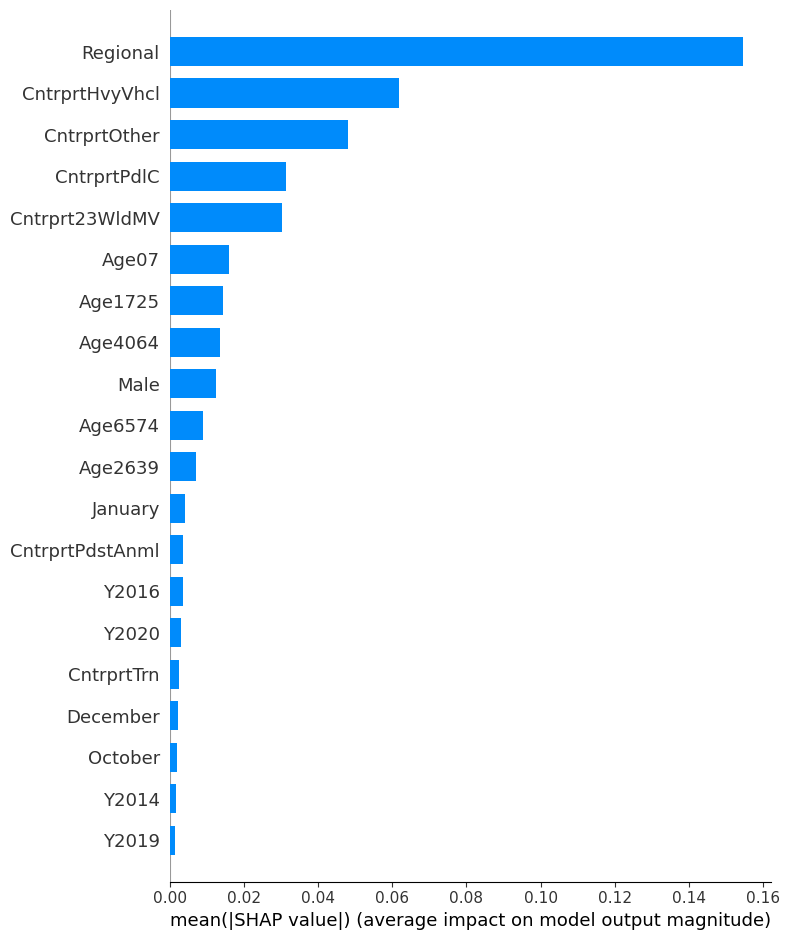

In [34]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")
